# Analiza zbioru online shoppers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("online_shoppers_intention.csv")

target = data.iloc[:, -1]

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

Mamy 18 zmiennych. Zdecydowana większość z nich przyjmuje wartości całkowite lub rzeczywiste. Występują również dwie kolumny wartości logicznych, z czego jedna - Revenue - jest naszą zmienną celu. Na szczęście nie mamy braków danych.

In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Największe odchylenie standardowe występuje w zmiennej `ProductRelated_Duration`. Wskazuje ona na czas jaki dany użytkownik spędził w danej sesji na stronie poświęconej produktom.

Zobaczmy dokładniej jak wygląda rozkład poszczególnych kolumn. 

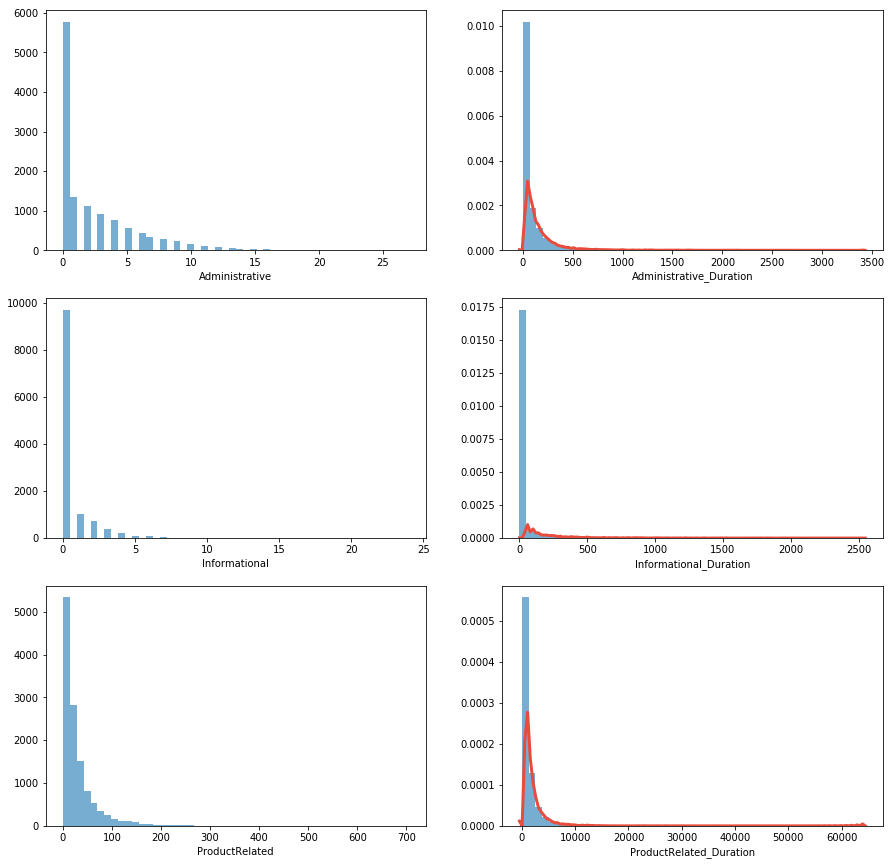

In [5]:
fig, ax =plt.subplots(3,2, figsize = (15, 15))
for i in (0,2,4):
    sns.distplot(data.iloc[:,i], kde = False, hist_kws={"alpha": 0.6}, ax=ax[int(i/2), 0])
    
j = 0
for i in (1,3,5):
    sns.distplot(data.iloc[:,i], kde = True, hist_kws={"alpha": 0.6},
                 kde_kws={"shade": False, "linewidth": 3, "color": "#e74c3c"}, ax=ax[j, 1])
    j += 1

fig.show()

Można zauważyć, że najwięcej czasu użytkownicy spędzili na stronach związanych z produktami. 

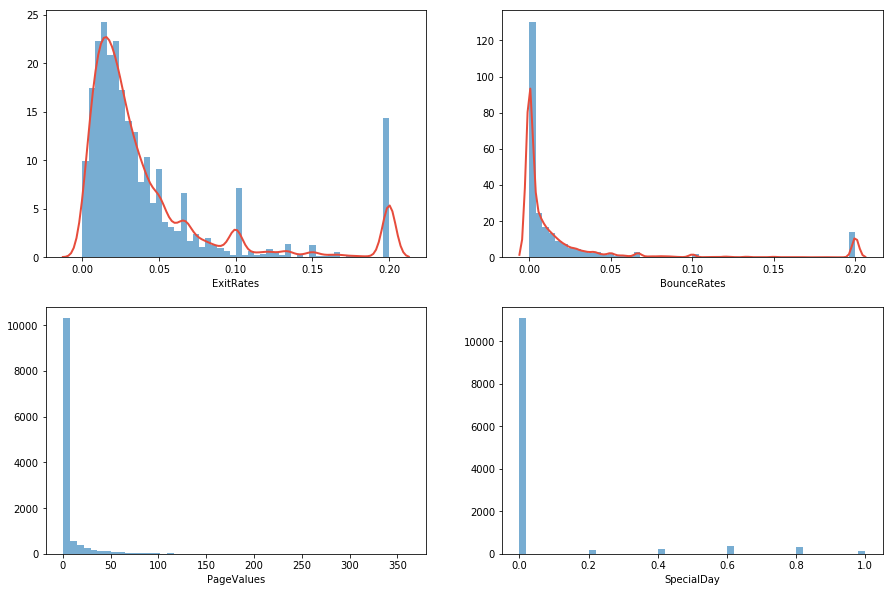

In [6]:
fig, ax =plt.subplots(2,2, figsize = (15, 10))

j = 0
for i in (7,6):
    sns.distplot(data.iloc[:,i], kde = True, kde_kws={"shade": False, "linewidth": 2, "color": "#e74c3c"},
                 hist_kws={"alpha": 0.6}, ax=ax[0, j])
    j += 1
    
j = 0
for i in (8,9):
    sns.distplot(data.iloc[:,i], kde = False, hist_kws={"alpha": 0.6},
                 ax=ax[1, j])
    j += 1

fig.show()

Rzędy wielkości zmiennych znacznie się od siebie różnią. Prawdopodobnie potrzebna będzie normalizacja danych.

In [7]:
data.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Najwięcej obserwacji pochodzi z maja i listopada

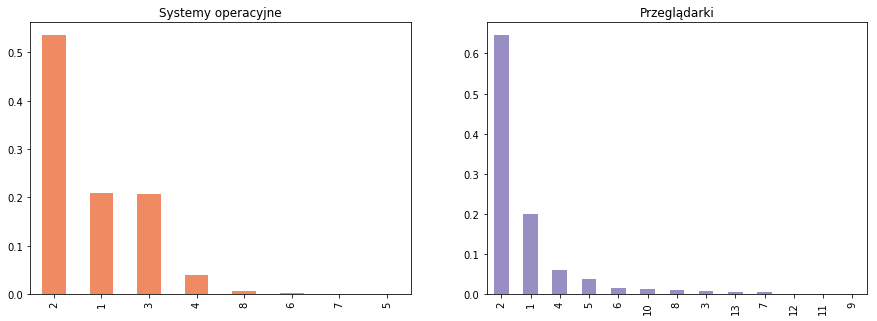

In [8]:
fig, ax =plt.subplots(1,2, figsize = (15, 5))
data.iloc[:,11].value_counts(normalize = True).plot.bar(ax = ax[0], color = "#ef8a62")
data.iloc[:,12].value_counts(normalize = True).plot.bar(ax = ax[1], color = "#998ec3")
ax[0].set_title("Systemy operacyjne")
ax[1].set_title("Przeglądarki")

fig.show()

Ponad 93% rekordów zaobserwowano na komputerach z jednym z 3 najpopularniejszych systemów operacyjnych.

W przypadku przeglądarek występuje dominacja dwóch programów. Zostało na nich zarejestrowanych 84.5% obserwacji.

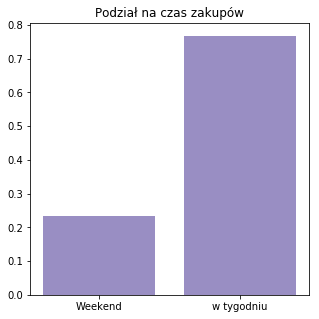

In [9]:
y = data.iloc[:,16].value_counts(normalize = True)[0]
x = data.iloc[:,16].value_counts(normalize = True)[1]

plt.figure(figsize=(5,5))
plt.bar(["Weekend", "w tygodniu"], [x, y], color = "#998ec3")
plt.title('Podział na czas zakupów')
plt.show()

Ponad 23% obserwacji pochodzi z weekendów.

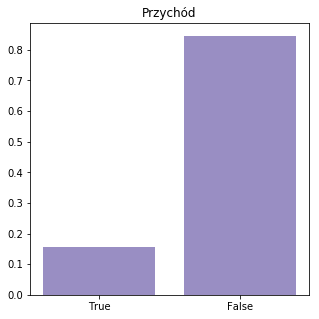

In [10]:
y = data.iloc[:,17].value_counts(normalize = True)[0]
x = data.iloc[:,17].value_counts(normalize = True)[1]

plt.figure(figsize=(5,5))
plt.bar(["True", "False"], [x, y], color = "#998ec3")
plt.title("Przychód")
plt.show()

Zbiór jest niezbalansowany. Liczba obserwacji będzie (jeśli nam zadziała) się znacząco różnić.

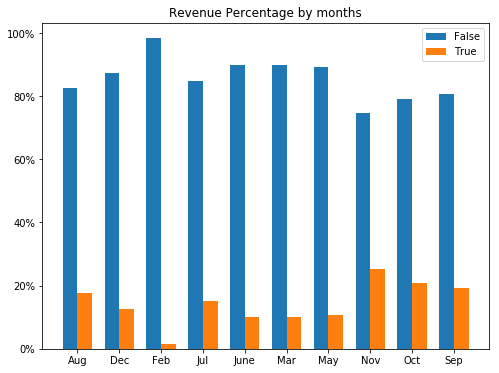

In [11]:
data_month = data.groupby(["Revenue","Month"]).size().groupby(level=1).apply(lambda x:100 * x / float(x.sum()))\
.unstack(fill_value=1)

x = np.arange(10)

width = 0.35

fig, ax = plt.subplots(figsize = (8, 6))

rects1 = ax.bar(x - width/2, data_month.iloc[0], width, label='False')
rects2 = ax.bar(x + width/2, data_month.iloc[1], width, label='True')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_yticklabels(("0%","20%","40%","60%","80%","100%"))
ax.set_title('Revenue Percentage by months')
ax.set_xticks(np.arange(10))
ax.set_xticklabels(data_month.columns)
ax.legend()
fig.show()

Najmniejsza część sesji zakończonych zakupem produktu była w lutym. W listopadzie, odsetek ten był najwyższy.

# Zależności między zmiennymi

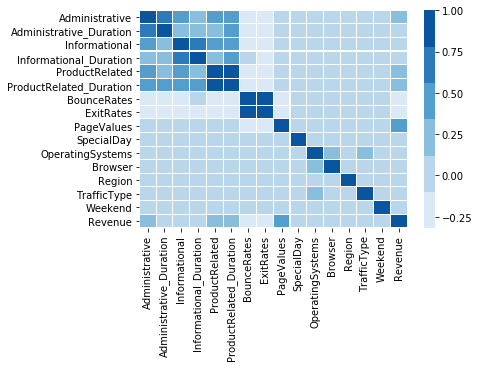

In [12]:
sns.heatmap(data.corr(), annot = False, linewidth = 0.05, linecolor = "white", cmap = sns.color_palette("Blues"))
plt.show()

Spójrzmy na lewy górny, który wskazuje występowanie zależności pomiędzy kolumnami dotyczącymi przeglądanych stron oraz czasu na nich spędzanych.

## Rodzaj odwiedzającego  vs przychód

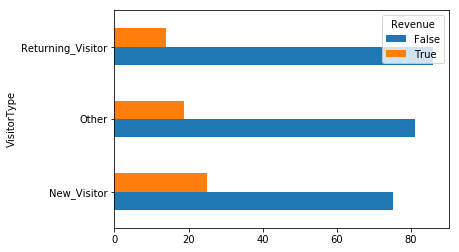

In [13]:
data.groupby(["VisitorType", "Revenue"]).size().groupby(level=0).apply(lambda x:100 * x / float(x.sum()))\
.unstack(fill_value=0).plot.barh()

In [14]:
data.groupby(["VisitorType", "Revenue"]).size().groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

VisitorType        Revenue
New_Visitor        False      75.088548
                   True       24.911452
Other              False      81.176471
                   True       18.823529
Returning_Visitor  False      86.067671
                   True       13.932329
dtype: float64

Spójrzmy jeszcze raz na te same kolumny, ale w innej konfiguracji.

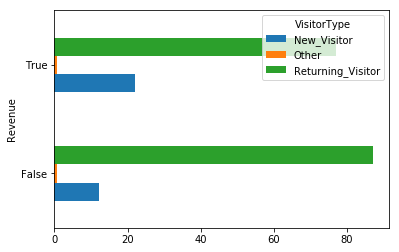

In [15]:
data.groupby(["Revenue","VisitorType"]).size().groupby(level=0).apply(lambda x:100 * x / float(x.sum()))\
.unstack(fill_value=0).plot.barh()

In [16]:
data.groupby(["Revenue","VisitorType"]).size().groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

Revenue  VisitorType      
False    New_Visitor          12.204951
         Other                 0.662061
         Returning_Visitor    87.132988
True     New_Visitor          22.117400
         Other                 0.838574
         Returning_Visitor    77.044025
dtype: float64

## ExitRates vs przychód

"The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session."

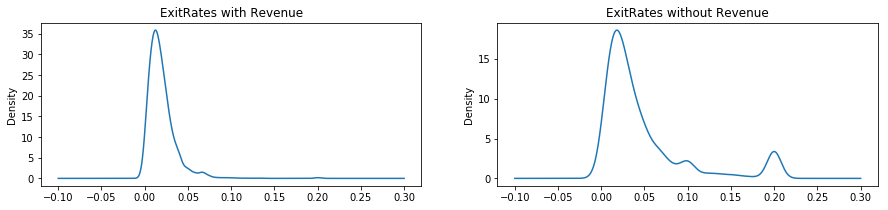

In [17]:
fig, ax =plt.subplots(1,2, figsize = (15, 3))
data.loc[data.Revenue==True,"ExitRates"].plot.kde(ax = ax[0], title = "ExitRates with Revenue")
data.loc[data.Revenue==False,"ExitRates"].plot.kde(ax = ax[1], title = "ExitRates without Revenue")
fig.show()

To samo, ale z lepiej widocznymi różnicami.

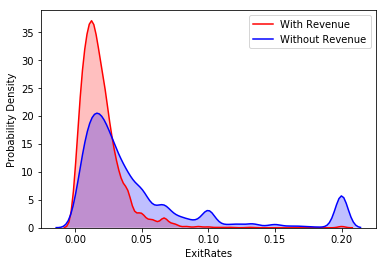

In [18]:
sns.kdeplot(data.loc[data.Revenue==True,"ExitRates"], color='r', shade=True, Label='With Revenue') 
sns.kdeplot(data.loc[data.Revenue==False,"ExitRates"], color='b', shade=True, Label='Without Revenue') 
plt.xlabel('ExitRates') 
plt.ylabel('Probability Density') 
plt.show()

## Krótkie spojrzenie na wspomniany fragment heatmapy.

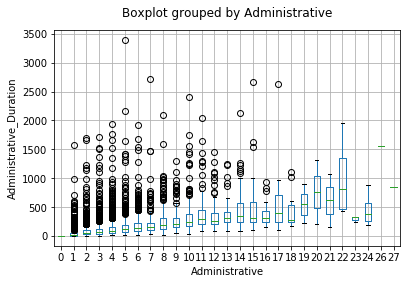

In [19]:
data.boxplot(column = ["Administrative_Duration"], by = "Administrative")
plt.title("")
plt.ylabel("Administrative_Duration")
plt.show()

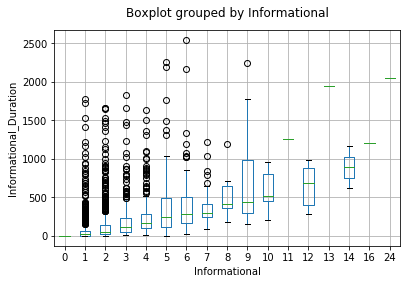

In [20]:
data.boxplot(column = ["Informational_Duration"], by = "Informational")
plt.title("")
plt.ylabel("Informational_Duration")
plt.show()

Ciekawa zależność między rodzajem użytkownika oraz czasem spędzonym na stronach związanymi z produktami, a przychodem

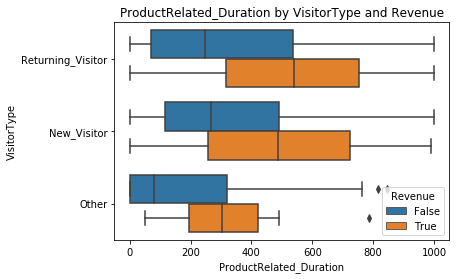

In [21]:
dt = data[data.ProductRelated_Duration < 1000]
sns.boxplot(x = "ProductRelated_Duration", y="VisitorType", data=dt, hue = "Revenue")
plt.title("ProductRelated_Duration by VisitorType and Revenue")
plt.show()

### ExitRates vs BounceRates

"The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction."

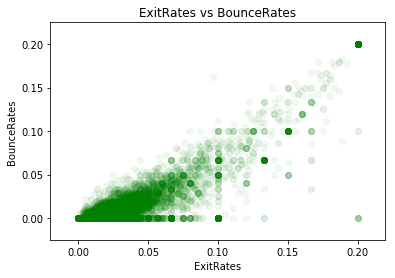

In [22]:
x = data.ExitRates
y = data.BounceRates
plt.scatter(x, y, alpha = 0.05, c = "green")
plt.xlabel("ExitRates")
plt.ylabel("BounceRates")
plt.title("ExitRates vs BounceRates")
plt.show()

# Podsumowanie

Zbiór składa się z 18 kolumn bez braków danych z czego kolumna logiczna "revenue" to kolumna celu. Ze wstępnej analizy ramki danych wynika, że przy tworzeniu modelu predykcyjnego, parę modyfikacji zbioru mogłoby polepszyć jego działanie:
- Oznaczenie mniej popularnych przeglądarek i systemów operacyjnych jako "inne"
- Normalizacja zmiennych ciągłych
- Usunięcie bounceRates/exitRates
- Usunięcie kolumn Administrative, Informational, ProductRelated lub ich odpowiedników czasowych